# Hierarchical Clustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [7]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [8]:
df = pd.read_csv("../songs_longtexts.csv")

In [4]:
data1 = df[df['artist'] == 'Eminem']
data2 = df[df['artist'] == 'ABBA']

In [11]:
data1 = df[df['genre1'] == 'alternative rock']
data2 = df[df['genre1'] == 'dance pop']

In [3]:
data1 = df[df['Genre1'] == 'Hip Hop']
data2 = df[df['Genre1'] == 'Latin']

In [12]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data.POS.values.astype(str))
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [13]:
data

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
365,877,For Tomorrow,Blur,/b/blur/for+tomorrow_20021033.html,he's a twentieth century boy with his hands o...,he 's a twentieth centuri boy with hi hand on...,twentieth sick seamless dear other la la la tw...,"['PRP', 'VBZ', 'DT', 'JJ', 'NN', 'NN', '_SP', ...",Rock,Electronic,alternative rock,britpop,257.0,124.0,1993,1990s
366,883,Let's All Go Down The Strand,Blur,/b/blur/lets+all+go+down+the+strand_20709994.html,one night half a dozen tourists met together ...,one night half a dozen tourist met togeth in ...,fourth happy little strange tired round same o...,"['CD', 'NN', '_SP', 'PDT', 'DT', 'NN', 'NNS', ...",Rock,Electronic,alternative rock,britpop,244.0,164.0,1993,1990s
367,886,Look Inside America,Blur,/b/blur/look+inside+america_20020991.html,good morning lethargy drink pepsi it's good f...,good morn lethargi drink pepsi it 's good for...,good good sore nasty last good second wide alr...,"['JJ', 'NN', 'NN', '_SP', 'VB', 'NNP', 'PRP', ...",Rock,Electronic,alternative rock,britpop,257.0,146.0,1997,1990s
368,890,Parklife,Blur,/b/blur/parklife_20021058.html,confidence is a preference for the habitual vo...,confid is a prefer for the habitu voyeur of w...,habitual dirty many enormous happy safe many r...,"['NN', 'VBZ', 'DT', 'NN', 'IN', 'DT', 'JJ', 'N...",Rock,Electronic,alternative rock,britpop,256.0,132.0,1994,1990s
520,1216,Rock 'n' Roll Lifestyle,Cake,/c/cake/rock+n+roll+lifestyle_20803585.html,well your cd collection looks shiny and costly...,well your cd collect look shini and costli . ...,shiny costly much bad much black much much muc...,"['UH', 'PRP$', 'NN', 'NN', 'VBZ', 'JJ', 'CC', ...",Rock,Electronic,alternative rock,garage rock,294.0,146.0,1994,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,32721,You're Still My Man,Whitney Houston,/w/whitney+houston/youre+still+my+man_10187531...,on the day that you left me you said you had ...,on the day that you left me you said you had ...,day bond spirit man nothing man nothing love l...,"['IN', 'DT', 'NN', 'WDT', 'PRP', 'VBD', 'PRP',...",Pop,Electronic,dance pop,pop,263.0,112.0,1987,1980s
13294,33579,Borderz,ZAYN,/z/zayn+malik/borderz_21107630.html,[verse 1] she is the life of the party don't...,[ vers 1 ] she is the life of the parti do n'...,good good pre right beautiful sweet good good ...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'PRP', '...",Pop,Rock,dance pop,electropop,356.0,106.0,2016,2010s
13295,33582,Like I Would,ZAYN,/z/zayn+malik/like+i+would_21107223.html,[verse 1] hey what's up it's been a while t...,[ vers 1 ] hey what 's up it 's been a while ...,cold hearted hearted late wired good cold hear...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'UH', 'W...",Pop,Rock,dance pop,electropop,357.0,97.0,2016,2010s
13296,33583,PillowTalk,ZAYN,/z/zayn+malik/pillowtalk_21106267.html,[verse 1] climb on board we'll go slow and h...,[ vers 1 ] climb on board we 'll go slow and ...,slow high light dark hard mellow pre close clo...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'NN', 'I...",Pop,Rock,dance pop,electropop,363.0,98.0,2016,2010s


In [14]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

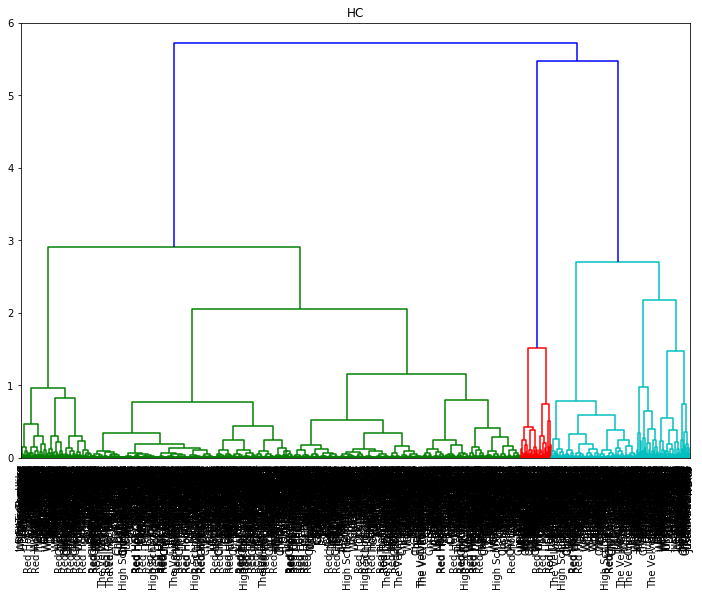

In [16]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data.artist.values, leaf_font_size=10);
plt.savefig('../images/HC/hc_alternative_rock_dance_pop.png', bbox_inches = "tight")

In [8]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'ro', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

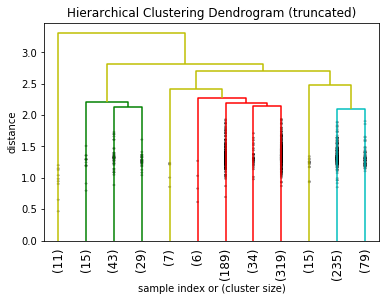

In [9]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
fancy_dendrogram(
    link_matrix,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    above_threshold_color='y',
    show_contracted=True,
    annotate_above=10  # useful in small plots so annotations don't overlap
)
plt.savefig('../images/HC/hc_latin_hiphop.png', bbox_inches = "tight")
plt.show()

In [12]:
def augmented_dendrogram(*args, **kwargs):
    
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro', c = c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

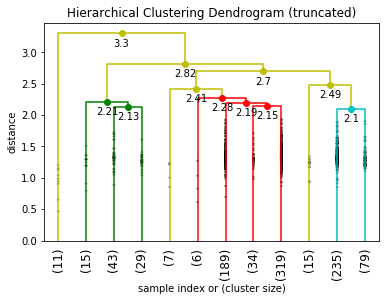

In [13]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
Z = linkage(tf_idf_array, 'ward')
augmented_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    above_threshold_color='y',
    show_contracted=True)
plt.savefig('../images/HC/hc_latin_hiphop.png', bbox_inches = "tight")
plt.show()

In [139]:
Z = linkage(tf_idf_array, 'ward')
Z[:20]

array([[4.28000000e+02, 5.79000000e+02, 4.66649503e-01, 2.00000000e+00],
       [7.78000000e+02, 7.79000000e+02, 6.15168343e-01, 2.00000000e+00],
       [2.39000000e+02, 9.82000000e+02, 6.50724643e-01, 3.00000000e+00],
       [4.09000000e+02, 5.80000000e+02, 6.94752655e-01, 2.00000000e+00],
       [7.14000000e+02, 7.19000000e+02, 7.95616619e-01, 2.00000000e+00],
       [7.75000000e+02, 8.66000000e+02, 8.29488222e-01, 2.00000000e+00],
       [3.24000000e+02, 6.71000000e+02, 8.50526308e-01, 2.00000000e+00],
       [6.82000000e+02, 6.87000000e+02, 8.56495952e-01, 2.00000000e+00],
       [2.90000000e+02, 5.78000000e+02, 8.69025799e-01, 2.00000000e+00],
       [3.41000000e+02, 4.02000000e+02, 8.70202274e-01, 2.00000000e+00],
       [1.59000000e+02, 9.77000000e+02, 8.85721802e-01, 2.00000000e+00],
       [6.91000000e+02, 9.84000000e+02, 9.03952944e-01, 4.00000000e+00],
       [7.30000000e+02, 9.86000000e+02, 9.09266209e-01, 3.00000000e+00],
       [8.91000000e+02, 9.61000000e+02, 9.15191540e

In [141]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
link_matrix[:20]

array([[4.28000000e+02, 5.79000000e+02, 4.66649503e-01, 2.00000000e+00],
       [7.78000000e+02, 7.79000000e+02, 6.15168343e-01, 2.00000000e+00],
       [2.39000000e+02, 9.82000000e+02, 6.50724643e-01, 3.00000000e+00],
       [4.09000000e+02, 5.80000000e+02, 6.94752655e-01, 2.00000000e+00],
       [7.14000000e+02, 7.19000000e+02, 7.95616619e-01, 2.00000000e+00],
       [7.75000000e+02, 8.66000000e+02, 8.29488222e-01, 2.00000000e+00],
       [3.24000000e+02, 6.71000000e+02, 8.50526308e-01, 2.00000000e+00],
       [6.82000000e+02, 6.87000000e+02, 8.56495952e-01, 2.00000000e+00],
       [2.90000000e+02, 5.78000000e+02, 8.69025799e-01, 2.00000000e+00],
       [3.41000000e+02, 4.02000000e+02, 8.70202274e-01, 2.00000000e+00],
       [1.59000000e+02, 9.77000000e+02, 8.85721802e-01, 2.00000000e+00],
       [6.91000000e+02, 9.84000000e+02, 9.03952944e-01, 4.00000000e+00],
       [7.30000000e+02, 9.86000000e+02, 9.09266209e-01, 3.00000000e+00],
       [8.91000000e+02, 9.61000000e+02, 9.15191540e